## **Nhập các thư viện cần thiết**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import matplotlib.patches as patches

## **Nhập dữ liệu**

In [2]:
csv_files = glob.glob('Processed Data/*.csv')

# Initialize an empty list to hold DataFrames
dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# combine all dataframes into one
road_df = pd.concat(dfs, ignore_index=True)

### **Kiểm tra dữ liệu**

#### Loại bỏ các dòng trùng với nhau

In [3]:
# Check for duplicates
duplicate_count = road_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates
road_df = road_df.drop_duplicates()

# Optionally, reset the index of the cleaned DataFrame
road_df.reset_index(drop=True, inplace=True)


Number of duplicate rows: 34154


#### Kiểm tra kiểu dữ liệu của từng cột

In [4]:
road_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469996 entries, 0 to 1469995
Data columns (total 28 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1469996 non-null  object 
 1   Location_Easting_OSGR                        1469895 non-null  float64
 2   Location_Northing_OSGR                       1469996 non-null  float64
 3   Longitude                                    1469895 non-null  float64
 4   Latitude                                     1469996 non-null  float64
 5   Police_Force                                 1469996 non-null  int64  
 6   Accident_Severity                            1469996 non-null  int64  
 7   Number_of_Vehicles                           1469996 non-null  int64  
 8   Number_of_Casualties                         1469996 non-null  int64  
 9   Date                                         1

#### Tiến hành bỏ các cột có quá nhiều giá trị bị thiếu 

In [5]:
# Calculate the missing ratio for each column
missing_ratios = road_df.isnull().mean()
threshold = 0.5

# Drop columns with missing ratio above the threshold
columns_to_drop = missing_ratios[missing_ratios > threshold].index
road_df = road_df.drop(columns=columns_to_drop)

print(f"Columns dropped: {list(columns_to_drop)}")


Columns dropped: ['Special_Conditions_at_Site']


## **Đặt câu hỏi**

### **Câu hỏi 1**

So sánh tỷ lệ tai nạn nghiêm trọng giữa các khu vực có và không có các thiết bị an toàn (vạch qua đường, đèn tín hiệu, biển báo). Những loại thiết bị nào chứng minh được hiệu quả nhất trong việc giảm thiểu tai nạn nghiêm trọng? 

#### Lợi ích sau khi trả lời câu hỏi

- Giúp đánh giá được độ hiệu quả của các thiết bị an toàn.

- Hướng dẫn phân bổ nguồn lực để cải thiện an toàn giao thông.

- Xác định biện pháp an toàn có tác động nhất.

#### Các thuộc tính có liên quan

`Accident_Severity`: thước đo độ nghiêm trọng của tai nạn 

`Junction_Control`: biển báo và đèn tín hiệu giao thông

`Pedestrian_Crossing-Physical_Facilities`: sự xuất hiện của vạch kẻ đường

`Number_of_Casualties`: số người thương vong

#### Hướng phân tích

- Phân tích dữ liệu ban đầu:
    - Tính toán tỉ lệ tai nạn nghiêm trọng có liên quan.
    - Tạo các hình ảnh trực quan.
    - Tiến hành đánh giá sơ bộ về sự hiện diện của thiết bị an toàn.

- Hiệu quả của thiết bị an toàn:
    - Nhóm và phân tích dữ liệu theo loại thiết bị an toàn (tín hiệu giao thông, giao cắt, biển báo)
    - Đánh giá tác động đến số lượng thương vong và mức độ nghiêm trọng

- So sánh toàn diện:
    - Kết hợp các phân tích trên các biện pháp an toàn khác nhau.
    - Rút ra kết luận tích hợp về cơ sở hạ tầng an toàn tối ưu.

#### Tiến hành phân tích

Đầu tiên ta xem xét sự phân bố của độ nghiêm trọng trong các vụ tai nạn đối và các điều kiện cơ sở vật chất liên quan.

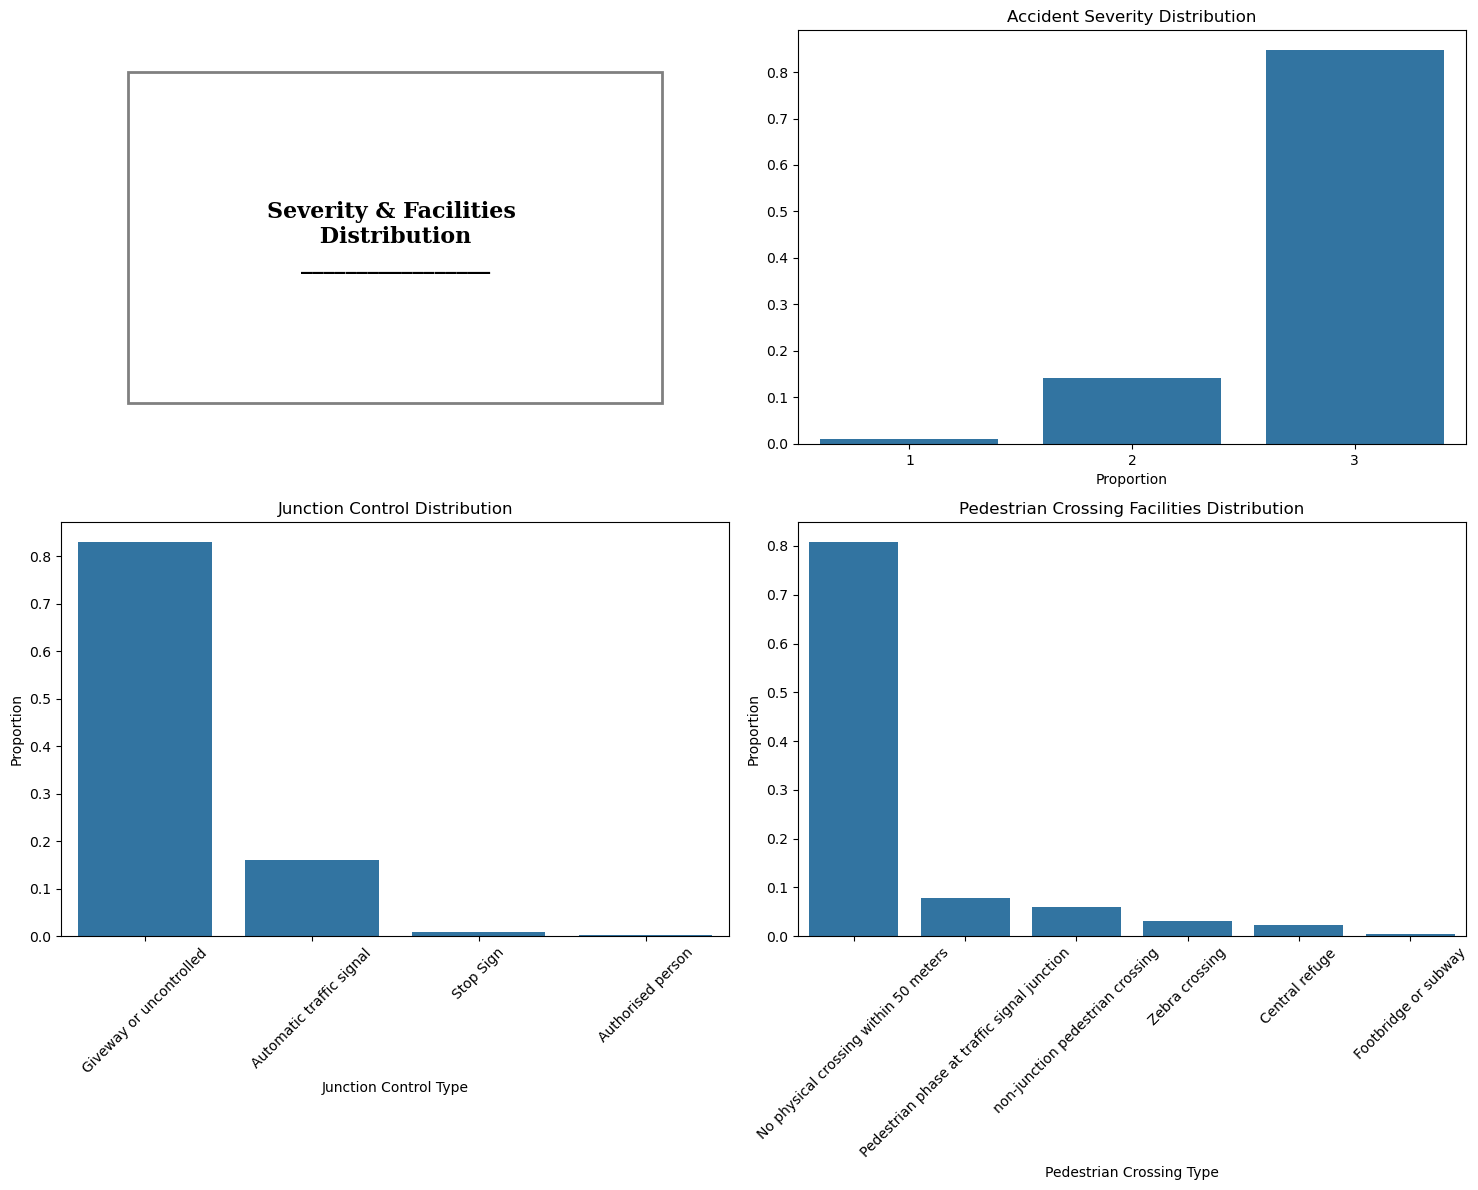

In [8]:
# overall severity distribution
severity_dist = df['Accident_Severity'].value_counts(normalize=True)

# # Safety equipment presence
junction_dist = df['Junction_Control'].value_counts(normalize=True)
crossing_dist = df['Pedestrian_Crossing-Physical_Facilities'].value_counts(normalize=True)

# Create figure with 2x2 grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# First subplot (top-left) - Text box with decorative border
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Add rectangle border
rect = patches.Rectangle((0.1, 0.1), 0.8, 0.8, linewidth=2, edgecolor='gray', facecolor='none')
ax1.add_patch(rect)

# Add text
ax1.text(0.5, 0.5, 'Severity & Facilities \n Distribution \n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=16,
         fontweight='bold',
         fontfamily='serif',
         transform=ax1.transAxes)

# Second subplot (top-right) - Accident Severity
sns.barplot(x=severity_dist.index, y=severity_dist.values, ax=ax2)
ax2.set_title('Accident Severity Distribution')
ax2.set_xlabel('Severity')
ax2.set_xlabel('Proportion')
ax2.tick_params(axis='x')

# Third subplot (bottom-left) - Junction Control
sns.barplot(x=junction_dist.index, y=junction_dist.values, ax=ax3)
ax3.set_title('Junction Control Distribution')
ax3.set_xlabel('Junction Control Type')
ax3.set_ylabel('Proportion')
ax3.tick_params(axis='x', rotation=45)

# Fourth subplot (bottom-right) - Pedestrian Crossing
sns.barplot(x=crossing_dist.index, y=crossing_dist.values, ax=ax4)
ax4.set_title('Pedestrian Crossing Facilities Distribution')
ax4.set_xlabel('Pedestrian Crossing Type')
ax4.set_ylabel('Proportion')
ax4.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**Nhận xét**

- Tỉ lệ tai nạn nghiêm trọng ở mức 3, mức nhẹ, chiếm phần lớn trong các trường hợp tai nạn.

- Ngoài ra ta còn hình dung được đa số các trường hợp tai nạn xảy ra tại các nơi không có vạch kẻ đường dành cho người đi bộ, không có các biển báo kiểm soát hoặc đèn tín hiệu,... điều này sẽ được làm rõ trong các phân tích tiếp theo


Phân tích độ hiệu quả của các thiết bị an toàn

In [15]:
# Calculate severity rates by equipment type
severity_by_junction = road_df.groupby(['Junction_Control', 'Accident_Severity']).size().unstack(fill_value=0)
severity_by_crossing = road_df.groupby(['Pedestrian_Crossing-Physical_Facilities', 'Accident_Severity']).size().unstack(fill_value=0)

# Convert to percentages
severity_by_junction_pct = severity_by_junction.div(severity_by_junction.sum(axis=1), axis=0) * 100
severity_by_crossing_pct = severity_by_crossing.div(severity_by_crossing.sum(axis=1), axis=0) * 100

print("\nSeverity Rates by Junction Control (%):")
print(severity_by_junction_pct)
print("\nSeverity Rates by Pedestrian Crossing (%):")
print(severity_by_crossing_pct)

# Calculate average casualties by equipment type
sum_casualties_junction = road_df.groupby('Junction_Control')['Number_of_Casualties'].sum()
sum_casualties_crossing = road_df.groupby('Pedestrian_Crossing-Physical_Facilities')['Number_of_Casualties'].sum()

print("\n Sum Casualties by Junction Control:")
print(sum_casualties_junction)
print("\n Sum Casualties by Pedestrian Crossing:")
print(sum_casualties_crossing)


Severity Rates by Junction Control (%):
Accident_Severity                1          2          3
Junction_Control                                        
Authorised person         1.137441  12.251185  86.611374
Automatic traffic signal  1.046473  12.181236  86.772291
Giveway or uncontrolled   1.341118  13.809573  84.849308
Stop Sign                 1.517385  12.691977  85.790638

Severity Rates by Pedestrian Crossing (%):
Accident_Severity                                   1          2          3
Pedestrian_Crossing-Physical_Facilities                                    
Central refuge                               1.463796  16.355036  82.181168
Footbridge or subway                         1.727402  12.186465  86.086133
No physical crossing within 50 meters        1.383227  13.603701  85.013073
Pedestrian phase at traffic signal junction  0.657590  11.691519  87.650891
Zebra crossing                               0.598326  12.433876  86.967798
non-junction pedestrian crossing         

Trực quan hóa để có cái nhìn tổng quan về kết quả phía trên

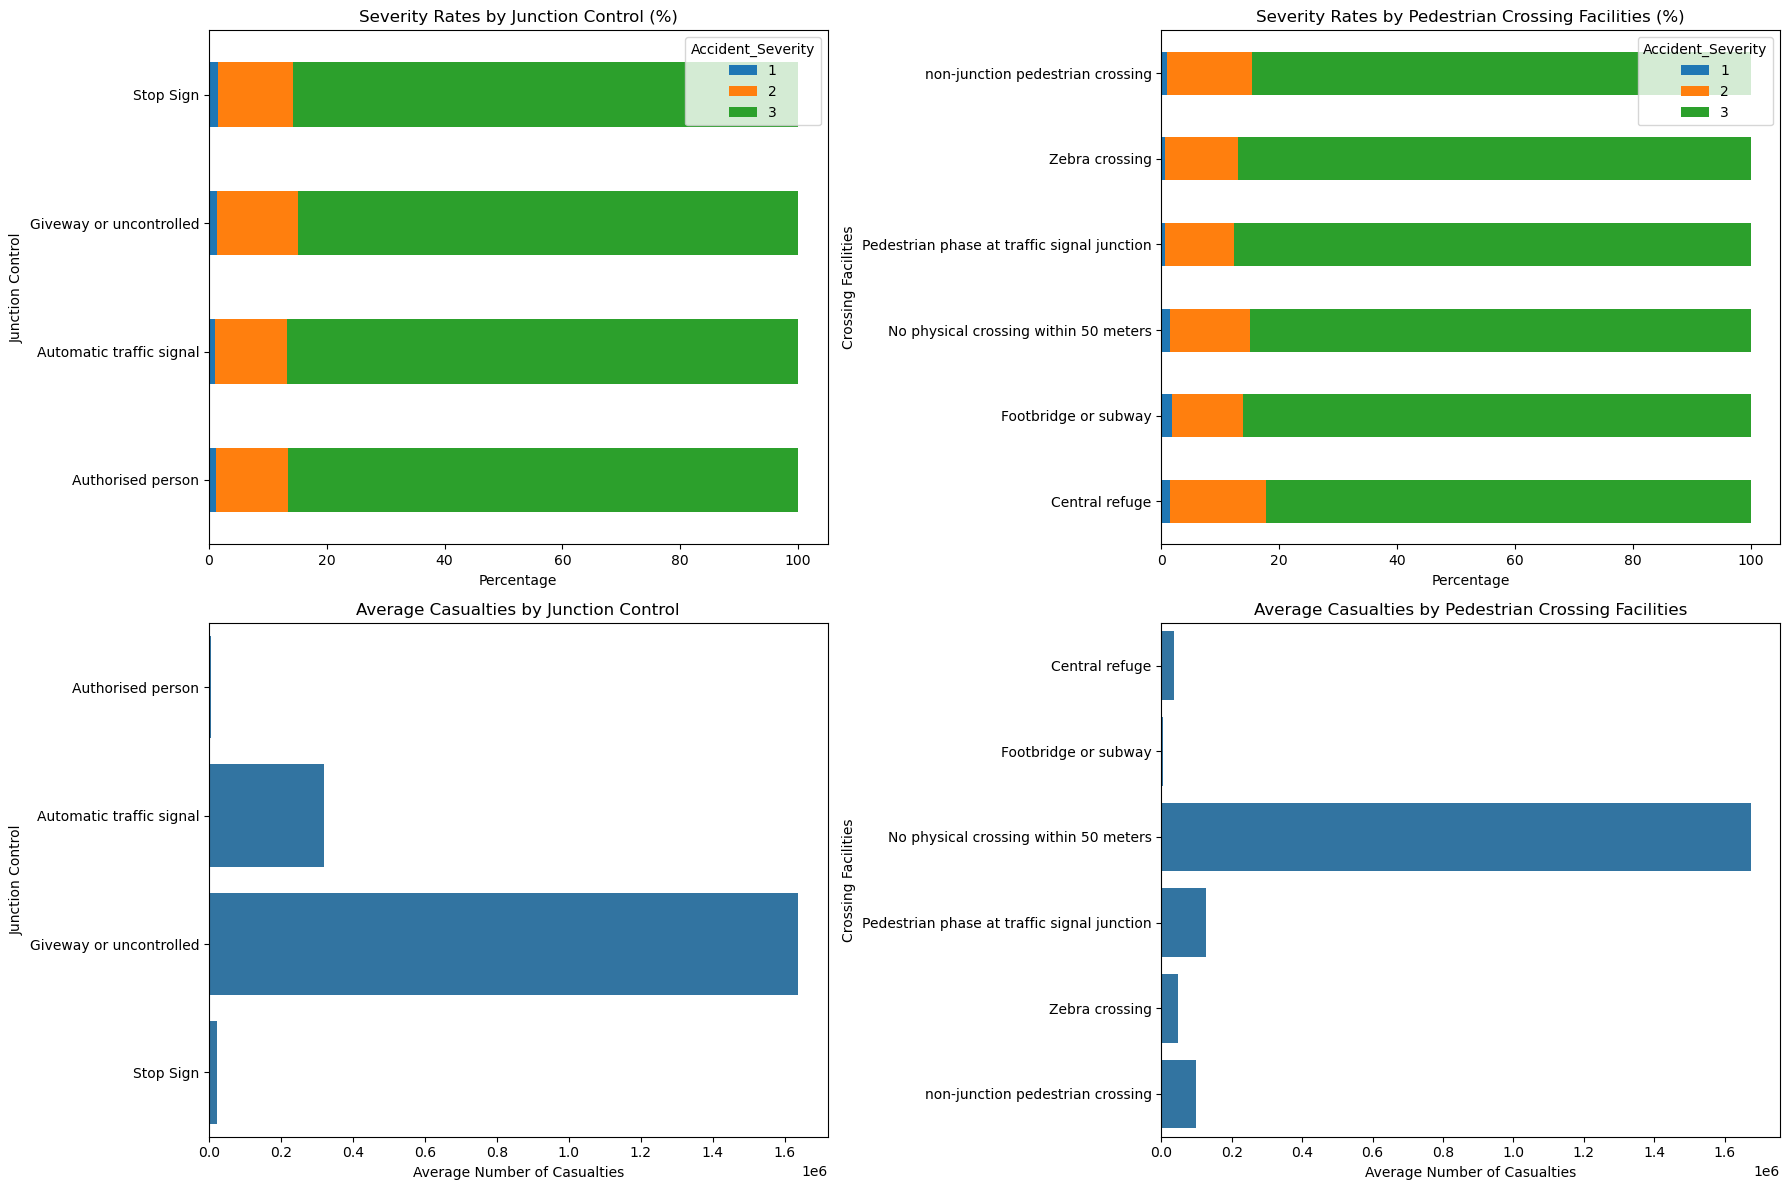

In [8]:
# Plot severity rates by Junction Control
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
severity_by_junction_pct.plot(kind='barh', stacked=True, ax=plt.gca())
plt.title('Severity Rates by Junction Control (%)')
plt.xlabel('Percentage')
plt.ylabel('Junction Control')

# Plot severity rates by Pedestrian Crossing Facilities
plt.subplot(2, 2, 2)
severity_by_crossing_pct.plot(kind='barh', stacked=True, ax=plt.gca())
plt.title('Severity Rates by Pedestrian Crossing Facilities (%)')
plt.xlabel('Percentage')
plt.ylabel('Crossing Facilities')

# Plot average casualties by Junction Control
plt.subplot(2, 2, 3)
sns.barplot(x=sum_casualties_junction.values, y=sum_casualties_junction.index, orient='h')
plt.title('Average Casualties by Junction Control')
plt.xlabel('Average Number of Casualties')
plt.ylabel('Junction Control')

# Plot average casualties by Pedestrian Crossing Facilities
plt.subplot(2, 2, 4)
sns.barplot(x=sum_casualties_crossing.values, y=sum_casualties_crossing.index, orient='h')
plt.title('Average Casualties by Pedestrian Crossing Facilities')
plt.xlabel('Average Number of Casualties')
plt.ylabel('Crossing Facilities')

plt.tight_layout()
plt.show()

**Nhận xét tổng quát**

- Tai nạn mức độ 3 chiếm trên 84% tổng số tai nạn ở mọi loại giao lộ và tiện nghi qua đường.

- Số lượng người gặp tai nạn nhẹ ở các điểm không có các cơ sở vật chất đảm bảo an toàn như biển báo giao thông, đèn tín hiệu giao thông, vạch kẻ đường cho người đi bộ gấp nhiều lần so với các phần đường có các yếu tố an toàn này.

- Tỉ lệ tai nạn nhẹ chiếm khoảng 85% trong tất cả các điều kiện có lẫn không có yếu tố thiết bị an toàn như vạch kẻ đường, biển báo giao thông hoặc đèn tín hiệu giao thông,... 

-> Điều này cho thấy mức độ nghiêm trọng của tai nạn không hề liên quan đến việc tồn tại hay không của các thiết bị an toàn, nhưng việc các phần đường không có các yếu tố an toàn này dẫn đến hậu quả xảy ra các vụ tai nạn thường xuyên hơn. Vì vậy việc chú trọng vào các yếu tố đảm bảo an toàn cho người tham gia giao thông là rất cần thiết trong việc giảm thiểu số lượng tai nạn.


### **Câu hỏi 2**


Có những mùa cố định trong năm mà tai nạn lặp lại nhiều ở các vị trí gần nhau không? Xem xét sự ảnh hưởng của thời tiết theo mùa đến số lượng vụ tai nạn.

#### Lợi ích sau khi trả lời câu hỏi

Ta sẽ xem xét được mối liên hệ giữa các mùa trong năm cũng như ảnh hưởng của thời tiết trong các mùa đó như thế nào đến số lượng tai nạn ở các vùng địa lý khác nhau.

#### Các thuộc tính liên quan

`Number_of_Casualties`: số lượng vụ tai nạn 

`Weather_Conditions`: điều kiện thời tiết

`Date`: ngày tháng năm

`Accident_Severity`: mức độ nghiêm trọng của các tai nạn

`Longitude`: kinh độ nơi xảy tai nạn

`Latitude`: vĩ độ nơi xảy ra tai nạn


#### Hướng phân tích

- Phân tích mối liên hệ giữa các thuộc tính bằng biểu đồ và bảng dữ liệu.

- Nhận xét sự thay đổi về số lượng vụ tai nạn qua các mùa và các điều kiện thời ở những vùng địa lý khác nhau.

#### Tiến hành phân tích

Ta thêm các thuộc tính trong bảng dữ liệu để tạo thuận lợi cho việc phân tích.

In [9]:
# Chuyển đổi cột 'Date' sang kiểu datetime
road_df['Date'] = pd.to_datetime(road_df['Date'], format='%d/%m/%Y')

# Thêm cột 'Month' và 'Season' (Mùa)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
         
road_df['Month'] = road_df['Date'].dt.month
road_df['Season'] = road_df['Month'].apply(get_season)

# Kiểm tra lại các cột mới
print(road_df[['Date', 'Month', 'Season']].head())

        Date  Month  Season
0 2005-01-04      1  Winter
1 2005-01-05      1  Winter
2 2005-01-06      1  Winter
3 2005-01-07      1  Winter
4 2005-01-10      1  Winter


Ta xem xét số lượng tai nạn xảy ra trong các mùa


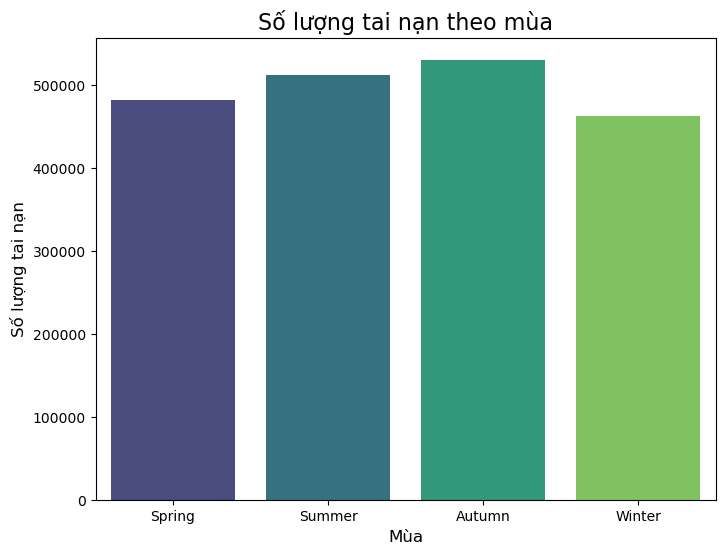

In [10]:
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
season_counts = road_df.groupby('Season')['Number_of_Casualties'].sum().reindex(season_order)
plt.figure(figsize=(8, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis', hue=season_counts.index)
plt.title('Số lượng tai nạn theo mùa', fontsize=16)
plt.xlabel('Mùa', fontsize=12)
plt.ylabel('Số lượng tai nạn', fontsize=12)
plt.show()

Ta thấy được rằng số lượng tai nạn tăng dần từ mùa xuân đến mùa thu rồi sau đó đột ngột giảm mạnh vào mùa đông, điều này có thể lý giải thông qua yếu tố thời tiết khiến cho việc điều khiển phương tiện giao thông gặp khó khăn dẫn đến họ cẩn trọng hơn trong lúc tham gia giao thông khiến cho việc số lượng tai nạn giảm xuống hoặc cũng chính vì điều kiện thời tiết nên họ chọn di chuyển trên các phương tiện công cộng nhiều hơn, ít tham gia giao thông cũng khiến số lượng tai nạn giảm đi nhiều.

Để xác minh cũng như làm rõ hơn ý kiến trên ta tiến hành phân tích về sự phân bố của sự nghiêm trọng các vụ tai nạn theo từng mùa.

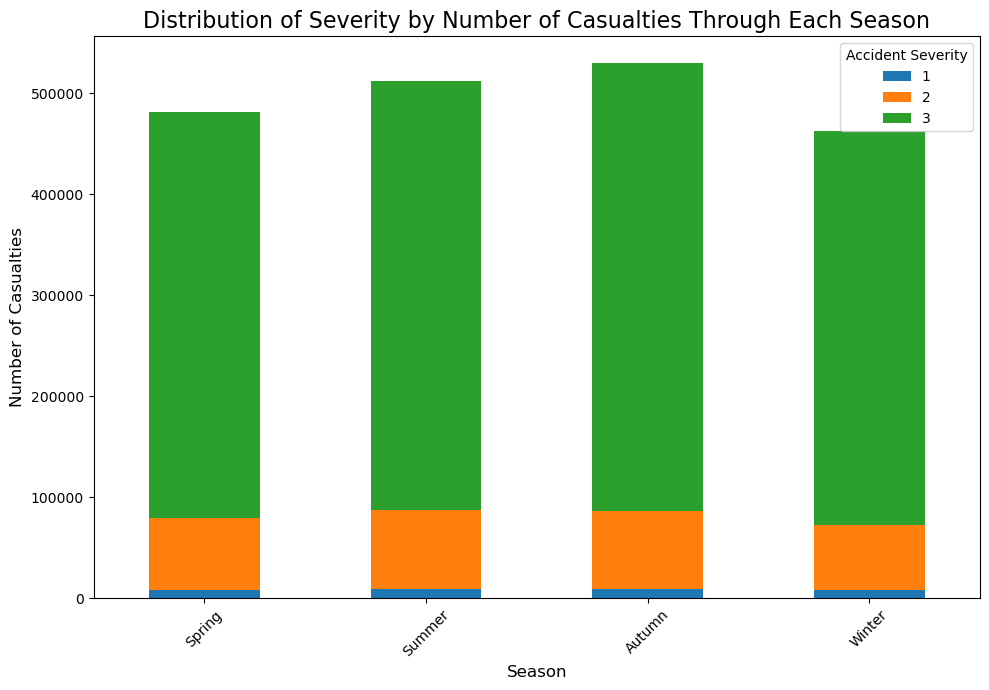

Accident_Severity     1      2       3
Season                                
Spring             8668  70474  402003
Summer             9206  77877  424955
Autumn             9556  76906  443543
Winter             8630  64307  389680


In [11]:
severity_by_season = road_df.groupby(['Season', 'Accident_Severity'])['Number_of_Casualties'].sum().unstack(fill_value=0).reindex(season_order)

severity_by_season.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Distribution of Severity by Number of Casualties Through Each Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Casualties', fontsize=12)
plt.legend(title='Accident Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(severity_by_season)   

Theo như biểu đồ và bảng dữ liệu ta có các nhận xét như sau:

- Đúng như phân tích trước đó, số lượng vụ tai nạn tăng nhưng lại giảm đột ngột ở mùa đông.

- Tất cả các loại tai nạn thuộc các mức độ khác nhau đồng loại giảm ở mùa đông sau khi tăng từ 8668 số vụ tai nạn nghiêm trọng ở mùa xuân sang 9206 vụ ở mùa hè rồi đến 9556 ở mùa thu, đáng kể là số vụ tai nạn ở mức nhẹ tăng mạnh xấp xỉ 41000 vụ từ 402003 đến 443543, trước khi giảm xấp xỉ 9000 vụ tai nạn nghiêm trọng chỉ còn 8630 vụ và 389680 vụ tai nạn nhẹ ở mùa đông.

- Số lượng các ca tai nạn nhẹ chiếm phần lớn số lượng tai nạn ở các mùa trong năm.



Ta tiến hành xem xét sự phân bố địa điểm xảy ra các vụ tai nạn qua các mùa khác nhau.

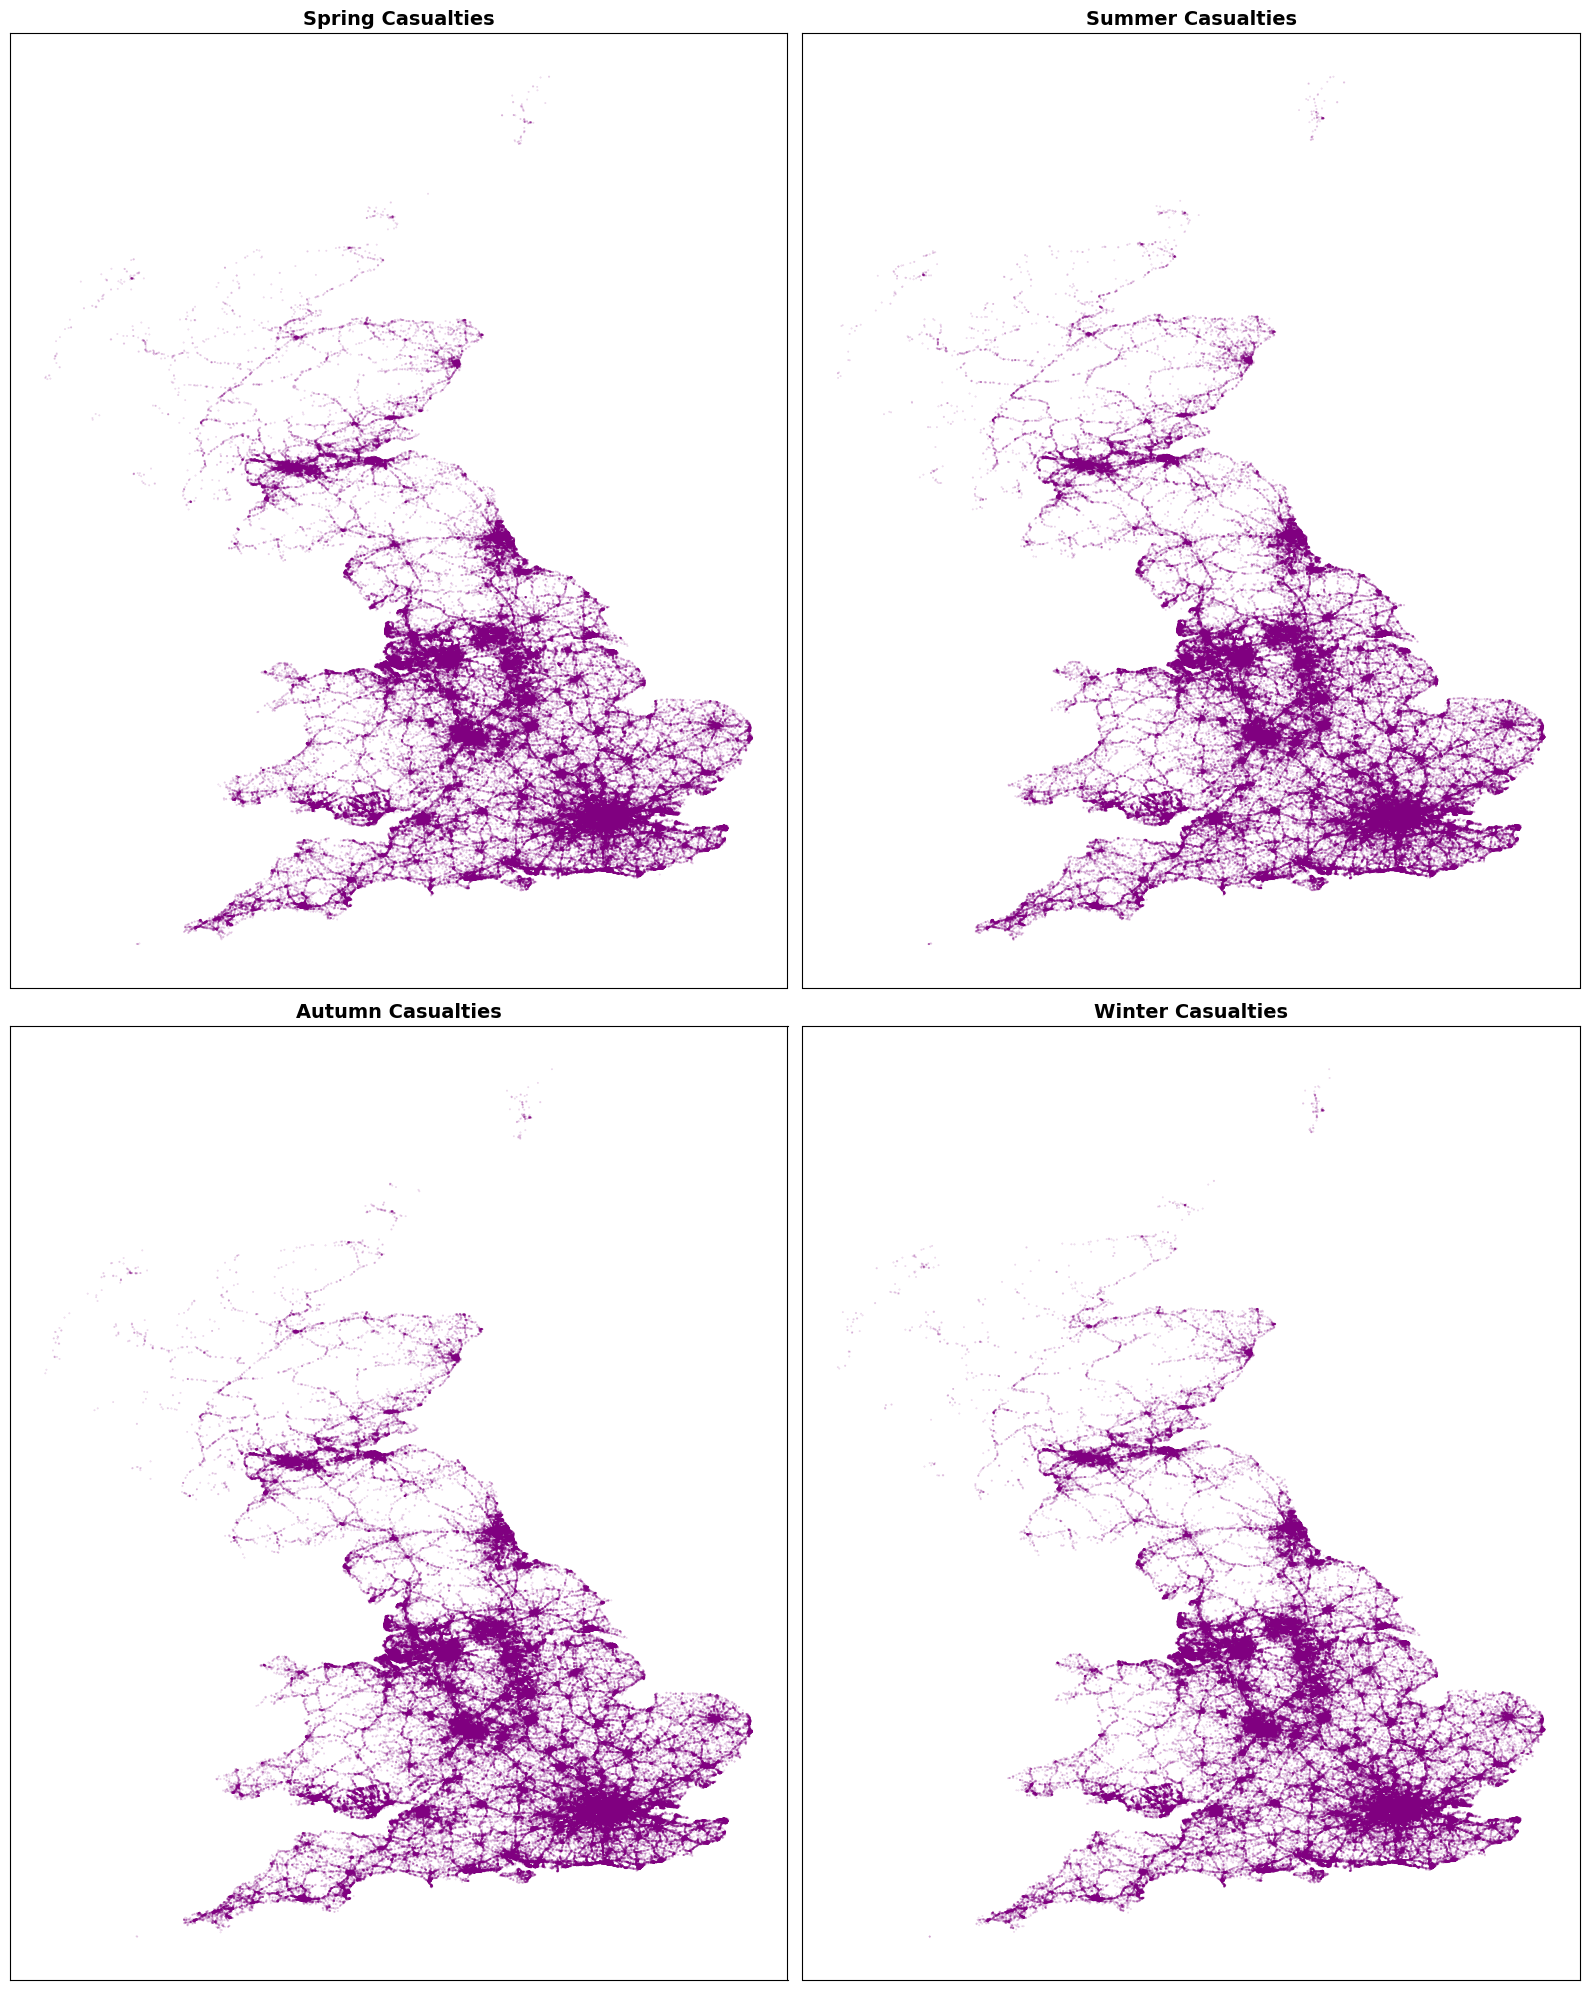

In [12]:
# Create figure with two subplots per row
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 20))
axs = axs.ravel()  # Flatten the 2x2 array to make it easier to iterate

# Plot each season
for i, season in enumerate(season_order):
    season_data = road_df[road_df['Season'] == season]
    
    # Create scatter plot
    axs[i].scatter(
        season_data.Longitude,
        season_data.Latitude,
        marker='.',
        alpha=0.2,
        s=season_data.Number_of_Casualties * 0.5,  # Scale point size with casualties
        c='purple'  # You can change color as needed
    )
    
    # Remove ticks for cleaner look
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
    # Set title
    axs[i].set_title(f"{season} Casualties", fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

Như ta có thể thấy tai nạn xảy ra tập trung ở những vùng nhất định quanh năm, không có sự đột biến ở vùng khác. Số lượng tai nạn khi quan sát qua bản đồ dường như ổn định quanh năm nếu như không có sự so sánh số liệu ở trên, điều đó cho thấy số lượng tai nạn biến động qua các mùa là có xảy ra nhưng không đáng kể so với tổng số lượng tai nạn trong năm.

Tiếp theo ta xem xét trong các mùa khác nhau, số lượng tai nạn ở các điều kiện thời tiết khác nhau như thế nào.

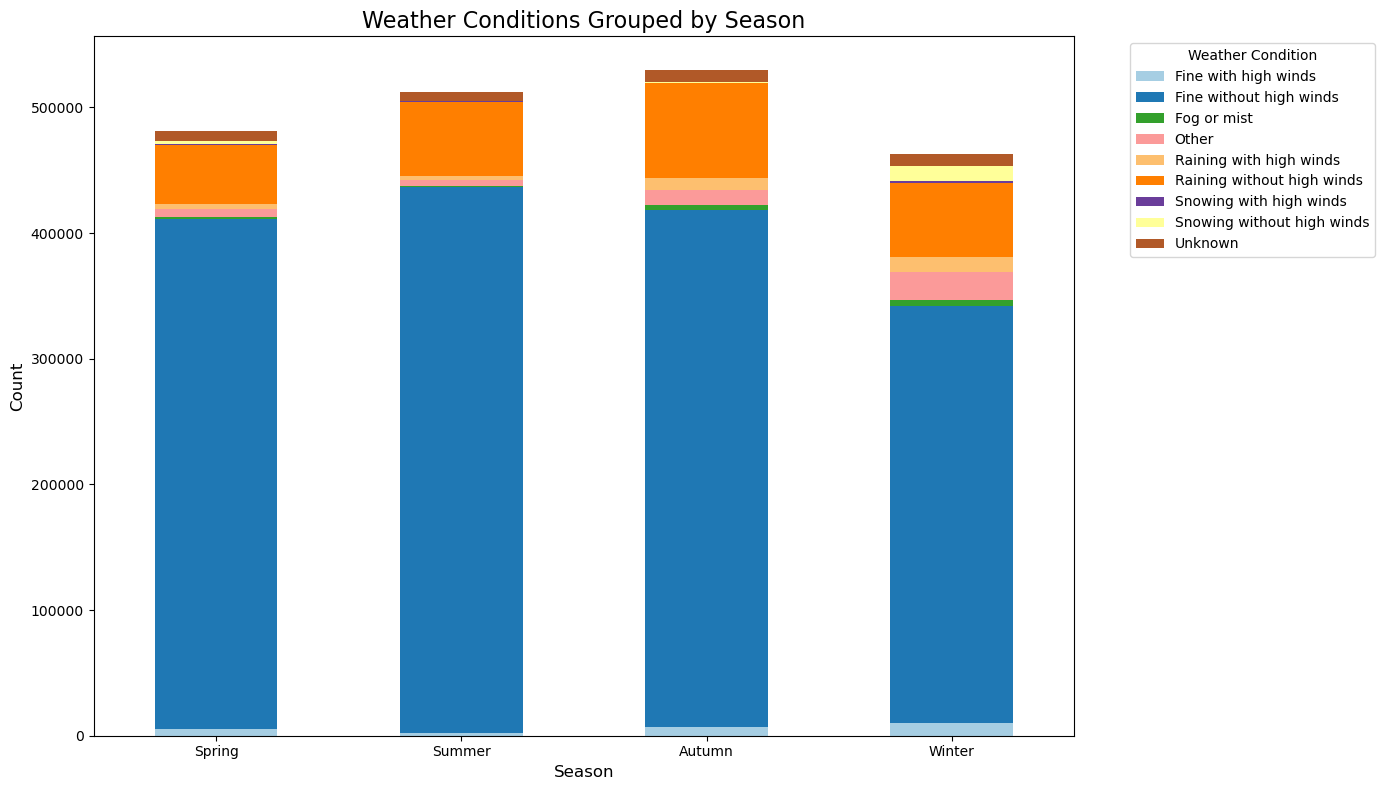

Weather_Conditions,Fine with high winds,Fine without high winds,Fog or mist,Other,Raining with high winds,Raining without high winds,Snowing with high winds,Snowing without high winds,Unknown
Season,,,,,,,,,
Spring,5325,405521,2098,6139,3784,47494,836,2021,7927
Summer,2138,434339,641,5133,2909,59486,13,81,7298
Autumn,7169,411500,3881,11647,9630,75262,180,1069,9667
Winter,10238,331771,4982,21764,12109,58830,1719,11792,9412


In [27]:
# Group by 'Season' and 'Weather_Condition' and count occurrences
weather_by_season = road_df.groupby(['Season', 'Weather_Conditions'])['Number_of_Casualties'].sum().unstack(fill_value=0).reindex(season_order)
weather_by_season = pd.DataFrame(weather_by_season)

# Plot the data
weather_by_season.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Paired')
plt.title('Weather Conditions Grouped by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

weather_by_season

Dựa vào biểu đồ và bảng số liệu ta có các nhận xét sau:

- Vào mùa đông số lượng tai nạn giảm đi nhiều nhưng tỉ lệ số lượng tai nạn giữa các điều kiện thời tiết khác nhau có sự thay đổi rõ rệt.

- Số lượng tai nạn ở điều kiện thời tiết có tuyết rơi không có gió mạnh (Snowing without high winds) tăng mạnh từ 1069 vụ ở mùa thu lên đến 11792 vụ ở mùa đông sau đó lại giảm xuống chỉ còn 2021 ở mùa xuân. Bên cạnh đó số vụ tai nạn ở điều kiện tuyết rơi có gió mạnh (Snowing with winds) cũng tăng mạnh từ 180 vụ lên 1719 từ thu sang đông.

- Ngoài ra số lượng tai nạn của các điều kiện thời tiết liên quan đến gió mạnh hoặc sương mù cũng có xu hướng tăng ở mùa đông, trong khi đó số lượng tai nạn liên quan đến điều kiện thời tiết thuận lợi không có gió mạnh (Fine without high winds) lại giảm.

**Nhận xét**

Qua các phần phân tích trên ta thấy được số lượng tai nạn tăng dần từ mùa xuân tới mùa thu nhưng sau đó lại giảm mạnh ở mùa đông. Điều này một phần là do điều kiện thời tiết khắc nghiệt hơn (có tuyết và gió mạnh) khiến cho người tham gia giao thông cẩn thận khi lưu thông, cũng như sử dụng phương tiện nhiều hơn làm giảm số lượng vụ tai nạn trong khi tỉ lệ số lượng vụ tai nạn liên quan tới thời tiết cực đoan như có tuyết và gió mạnh lại tăng mạnh. 

Ngoài ra số lượng vụ tai nạn tập trung ở các vùng cố định, so với tổng số vụ tai nạn thì không có biến động lớn, điều này cho thấy thời tiết ở các mùa trong năm không làm biến đổi sự phân bố số lượng vụ tai nạn ở các vùng địa lý khác nhau.